In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

from HodoUtils import HodoSummarySet

![hodo](./media/hodo_layout.png)

In [2]:
# load the datasets as hodosummary objects (stored as Pandas dataframes)
hss = HodoSummarySet()
hss.load_summary_file('./data/31854/ftHodo_OverviewFile_0_04-05-2018_09.13.25_AM.txt', 31854)
hss.load_summary_file('./data/31869/ftHodo_OverviewFile_0_04-05-2018_02.16.52_AM.txt', 31869)
hss.load_summary_file('./data/31878/ftHodo_OverviewFile_0_04-05-2018_03.19.25_AM.txt', 31878)
hss.load_summary_file('./data/31886/ftHodo_OverviewFile_0_04-04-2018_09.59.09_AM.txt', 31886)

In [3]:
# print runs loaded
hss.runs

[31854, 31869, 31878, 31886]

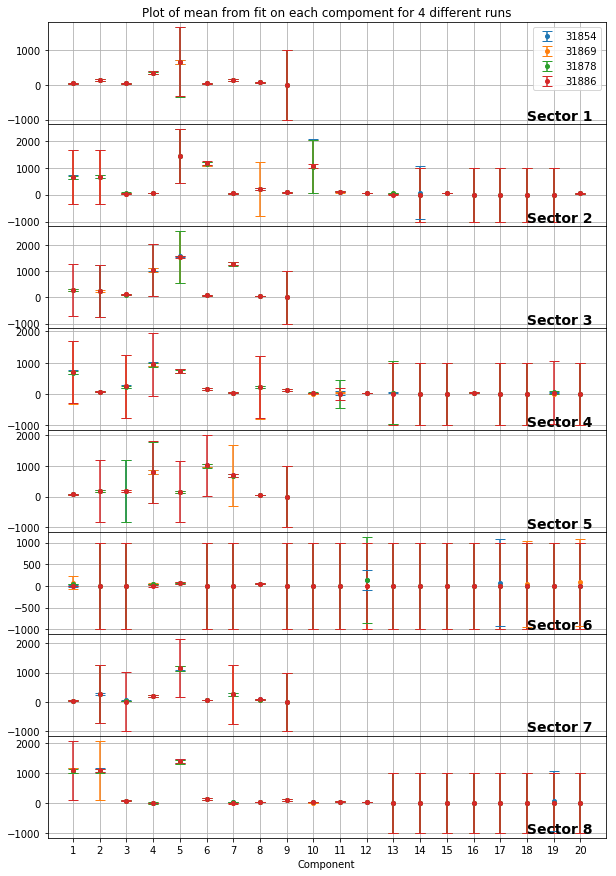

In [4]:
# plot the means for each run by sector

# create figure and set plotting options
fig, axes = plt.subplots(8, 1, figsize=(10, 15), sharex=True)
options = dict(marker='.', linestyle='None', ms=8, mew=1, capsize=5)

# plot data per sector
for sector in hss.sectors:
    # new subplot per sector
    ax = axes[sector-1]
    
    # plot data for each run on the subplot axes
    for i, run in enumerate(hss.runs):
        x, y, err = hss.get_sector_data(run, sector, 1, "m_mips_maxV")
        ax.errorbar(x, y, yerr=err, label=str(run), **options) # plot points with errors (sigma)
    ax.grid()
    
    # add text to each subplot to make it clear which sector
    ax.text(0.85, 0.15, 
            ' Sector {}'.format(sector), 
            transform=ax.transAxes, 
            fontsize=14, 
            weight='bold',
            verticalalignment='top')

# legend and title options
axes[0].legend(loc=1)
axes[0].set_title('Plot of mean from fit on each compoment for 4 different runs')
axes[-1].set_xlabel('Component')
plt.xticks(range(1, 21))
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

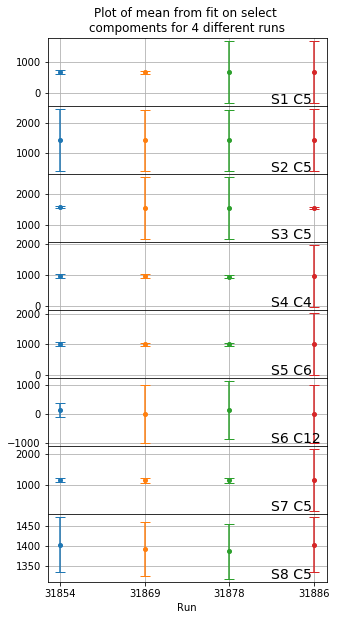

In [5]:
# plot specific sector and components of interest, using same method as above
idx = [(1, 5), (2, 5), (3, 5), (4, 4), (5, 6), (6, 12), (7, 5), (8, 5)] # [(sector, component), ...]

fig, axes = plt.subplots(8, 1, figsize=(5, 10), sharex=True)
options = dict(marker='.', linestyle='None', ms=8, mew=1, capsize=5)

# plot each sector seperately using list of tuples above
for i, sc in enumerate(idx):
    s, c = sc # sector and component
    ax = axes[i]
    
    # plot the 4 runs per sector
    for x, run in enumerate(hss.runs):
        _, y, err = hss.get_sector_data(run, s, 1, "m_mips_maxV")
        ax.errorbar(x, y[c-1], err[c-1], label=str(run), **options) # -1 since index 0
    ax.grid()
    ax.text(0.8, 0.2, 
        'S{} C{}'.format(s, c), 
        transform=ax.transAxes, 
        fontsize=14, 
        verticalalignment='top')

# title options
axes[0].set_title('Plot of mean from fit on select \ncompoments for 4 different runs')
axes[-1].set_xlabel('Run')
axes[-1].set_xticks(range(4))
axes[-1].set_xticklabels(map(str, hss.runs))
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

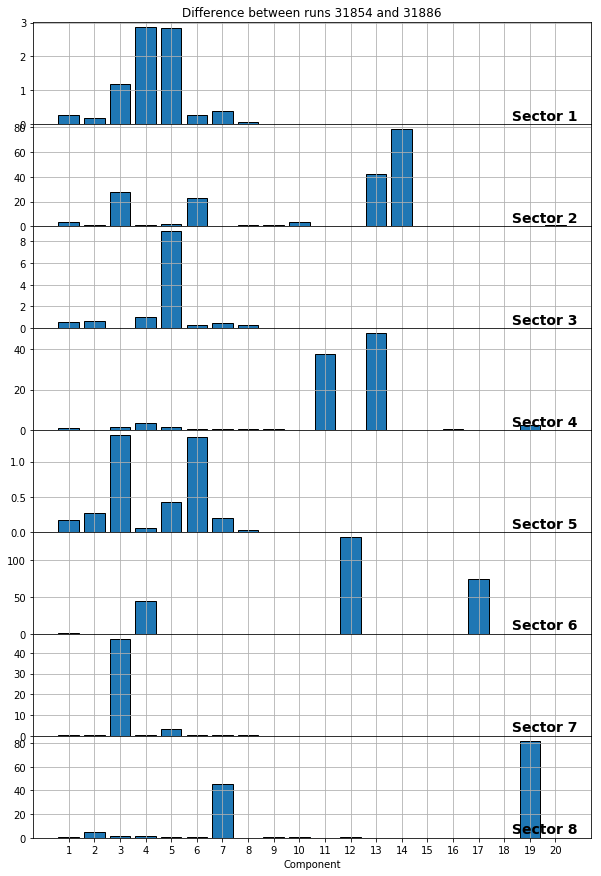

In [6]:
# plot to compare runs 31854 and 31886
fig, axes = plt.subplots(8, 1, figsize=(10, 15), sharex=True)

run1, run2 = 31854, 31886

# split plots per sector
for sector in hss.sectors:
    ax = axes[sector-1]
    x1, y1, err1 = hss.get_sector_data(run1, sector, 1, "m_mips_maxV")
    x2, y2, err2 = hss.get_sector_data(run2, sector, 1, "m_mips_maxV")
    
    # plot the absolute difference between the 2 above runs
    ax.bar(x2, np.abs(y2-y1), label=str(run2), edgecolor='k')
    ax.grid()
    ax.text(0.85, 0.15, 
            ' Sector {}'.format(sector), 
            transform=ax.transAxes, 
            fontsize=14, 
            weight='bold',
            verticalalignment='top')

# title options
axes[0].set_title('Difference between runs 31854 and 31886')
axes[-1].set_xlabel('Component')
plt.xticks(range(1, 21))
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [7]:
# plot above shows some huge differences for a handful of components, let's check these later
check = [(2,13), (4,11), (6,4), (7,3), (8,7)]

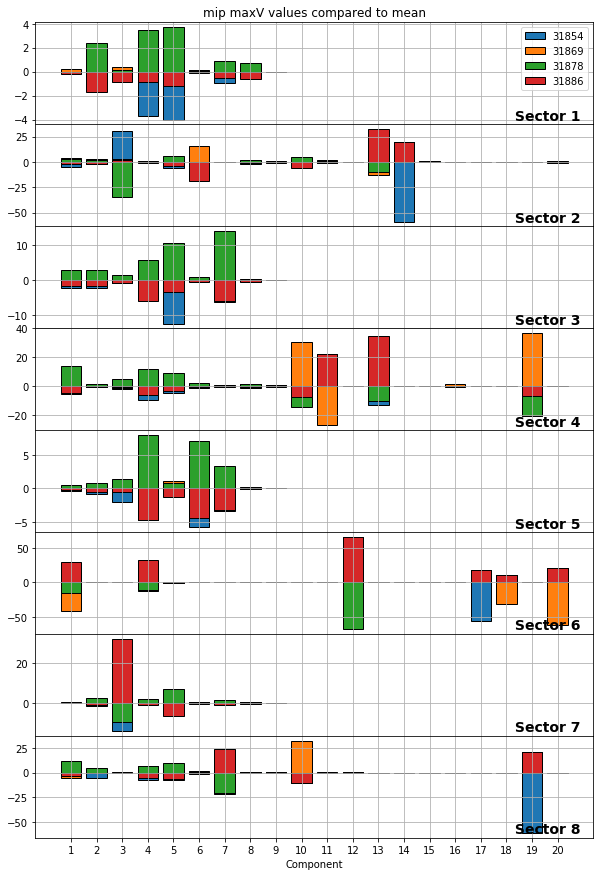

In [8]:
# plot the different from the mean for all components (layer 1)
# flat values for each run, and a mean to make a difference from

fig, axes = plt.subplots(8, 1, figsize=(10, 15), sharex=True)

# split plots by sector
for sector in hss.sectors:
    ax = axes[sector-1] # index 0
    df = hss.df[(hss.df['sector']==sector) & (hss.df['layer']==1)] # data for specific sector and first layer
    
    # calculate the mean mips maxV per component across all 4 runs
    y_mean = df.groupby('component')['m_mips_maxV'].mean().values
    
    # plot the 4 runs
    for run in hss.runs:
        df_run = df[df['run_id']==run] # only data from this run
        x, y = df_run['component'].values, df_run['m_mips_maxV'].values # get values of interest from this run
        ax.bar(x, y_mean-y, label=str(run), edgecolor='k') # plot mean value minus run value to get difference
    ax.grid()
    ax.text(0.85, 0.15, 
        ' Sector {}'.format(sector), 
        transform=ax.transAxes, 
        fontsize=14, 
        weight='bold',
        verticalalignment='top')

# title and legend options
axes[0].legend()
axes[0].set_title('mip maxV values compared to mean')
axes[-1].set_xlabel('Component')
plt.xticks(range(1, 21))
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

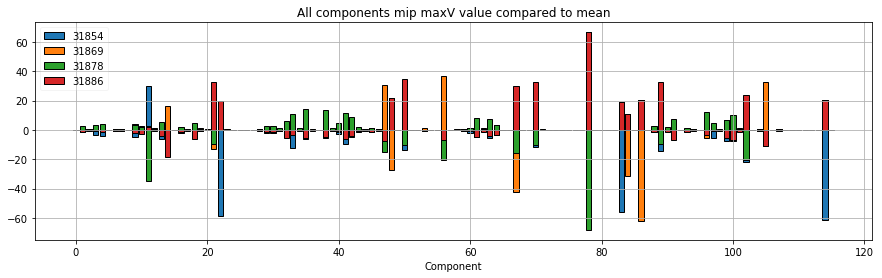

In [9]:
# plot the different from the mean for all components (layer 1)
# flat values for each run, and a mean to make a difference from
# same data as above plot but not seperated by sector

fig, ax = plt.subplots(1, 1, figsize=(15, 4), sharex=True)

df = hss.df[(hss.df['layer']==1)] # only data from first layer
y_mean = df.groupby(['sector', 'component'])['m_mips_maxV'].mean().values # get mean value for all runs
x = range(len(y_mean)) # arbitrary
for run in hss.runs:
    y = df[df['run_id']==run]['m_mips_maxV'].values # values for specific run
    ax.bar(x, y_mean-y, label=str(run), edgecolor='k') # plot different with mean

# title and legend options
ax.grid()
leg = ax.legend(loc=2)
leg.get_frame().set_alpha(0.2)
ax.set_title('All components mip maxV value compared to mean')
ax.set_xlabel('Component')
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

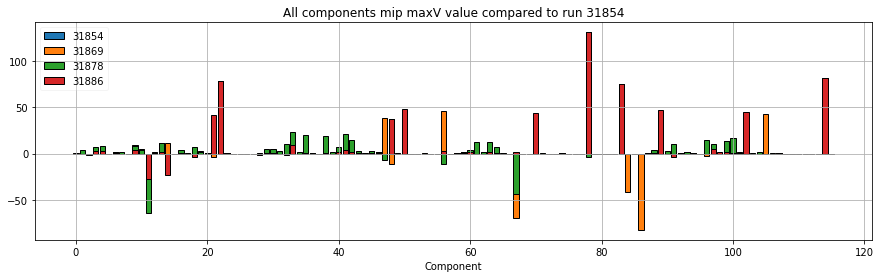

In [10]:
# plot the different from the first run with other for all components (layer 1)
# same as above but using the difference from the first run instead of mean

fig, ax = plt.subplots(1, 1, figsize=(15, 4), sharex=True)

df = hss.df[(hss.df['layer']==1)]
y_ref = df[df['run_id']==hss.runs[0]]['m_mips_maxV'].values # use first run as reference value
x = range(len(y_ref)) # arbitrary
for run in hss.runs:
    y = df[df['run_id']==run]['m_mips_maxV'].values # get run values
    ax.bar(x, y_ref-y, label=str(run), edgecolor='k') # plot difference with first run instead of mean

# title and legend options
ax.grid()
leg = ax.legend(loc=2)
leg.get_frame().set_alpha(0.2)
ax.set_title('All components mip maxV value compared to run 31854')
ax.set_xlabel('Component')
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()